In [6]:
import json
import numpy as np
import trimesh
import open3d as o3d
import cv2
import torch

from utils.data_load import load_image, load_3d_model, visualize_data # our own utils

In [2]:
# # % is provided by the IPython kernel and allows you to run "magic commands", many of which include well-known shell commands.
# # !, provided by Jupyter, allows shell commands to be run within cells.
# %pip install numpy

# Load dataset

In [7]:
dir = "data/pix3d"

In [8]:
with open(f"{dir}/pix3d.json", "rb") as f:
    metadata = json.load(f)

# Check as example 1 data point

In [9]:
ind = 2

In [10]:
# img, img_size, 2d_keypoints, mask, model, 3d_keypoints, voxel, rot_mat, trans_mat, focal_length, cam_position, inplane_rotation, bbox
metadata[ind]

{'img': 'img/bed/0003.png',
 'category': 'bed',
 'img_size': [372, 292],
 '2d_keypoints': [[[308.0, 202.09375],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [303.0, 260.09375],
   [-1.0, -1.0],
   [108.0, 92.09375],
   [329.0, 109.09375],
   [337.0, 38.09375],
   [110.0, 35.09375],
   [273.0, 116.09375],
   [-1.0, -1.0]],
  [[312.5, 196.09375],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [305.5, 273.09375],
   [-1.0, -1.0],
   [111.5, 125.09375],
   [332.5, 149.09375],
   [336.5, 38.09375],
   [107.5, 32.09375],
   [333.5, 185.09375],
   [110.5, 164.09375]],
  [[308.0, 195.09375],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [341.0, 38.09375],
   [109.0, 34.09375],
   [338.0, 184.09375],
   [-1.0, -1.0]]],
 'mask': 'mask/bed/0003.png',
 'img_source': 'ikea',
 'model': 'model/bed/IKEA_HEMNES_1/model.obj',
 'model_raw': None,
 'model_source': 'ikea',
 '3d_keypoints': 'model/bed/IKEA_HEMNES_1/3

In [11]:
img_path = dir+'/'+metadata[ind]["img"]
mask_path = dir+'/'+metadata[ind]["mask"]
model_path = dir+'/'+metadata[ind]["model"]

In [12]:
img, mask = load_image(img_path, mask_path)
model_img = load_3d_model(model_path)

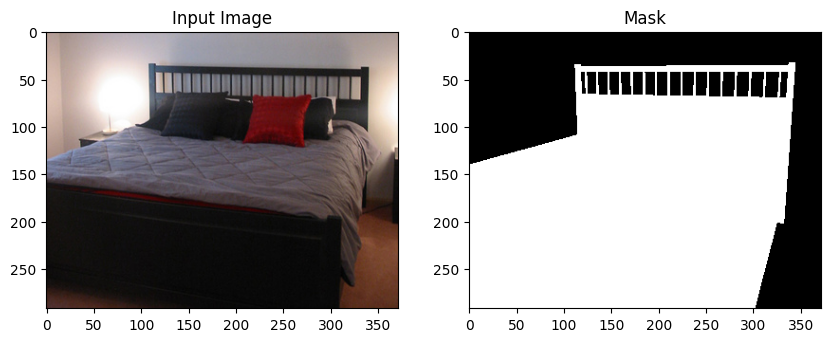

In [13]:
visualize_data(img, mask)

In [15]:
# visulize it as a mash
model_img.show()

In [16]:
if isinstance(model_img, trimesh.Scene):
    # combine all geometries, if this is a scene
    model_img = model_img.to_geometry()
else:
    model_img = model_img

# # point_cloud, _ = trimesh.sample.sample_surface(model_img, count=1024)  # Sample 1024 points 

In [12]:
# # from trimesh create PointCloud and visualize it
# pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(point_cloud)

# o3d.visualization.draw_geometries([pcd])

In [13]:
# # example data as arrays for PointCloud
# np.asarray(pcd.points)

# Make the model be in the same pose, as 2d image

### Original version of PIX3D paper, but many libraries outdated, so should be fixed

# Conslustions and approach
### *Better to use mash and predict vertices, after this use some algorithm to calculate faces*